# Integración numérica

## Planteamiento del problema

Dada una función $f:[a,b] \to \mathbb{R}$ continua a pedazos (tiene a lo más un número numerable de discontinuidades), quiero calcular $\int_{a}^{b} f(s) ds$

## ¿Cómo calculo una integral numéricamente?

Primero recordamos la definición. Sea $P = \{x_0=a, x_1, \ldots, x_{n-1}, x_n = b\}$  una **partición regular** de $[a,b]$. Es decir, se cumple que

1. $x_{i} < x_{i+1}$ 

2.  $x_{i+1} - x_{i} = h = \frac{b-a}{n}$

### Sumas de Riemann

$$
\int_{a}^{b} f(s) ds \approx \sum_{i=1}^{n} f(\xi_i)(x_{i} - x_{i-1}) = h \sum_{i=1}^{n}  f(\xi_i)
$$

con $\xi_i \in [x_{i-1},x_{i}]$

$$
\int_{a}^{b} f(s) ds = \lim_{n \to \infty} \sum_{i=1}^{n} f(\xi_i)(x_{i} - x_{i-1}) = \lim_{n \to \infty} h \sum_{i=1}^{n}  f(\xi_i)
$$

con $\xi_i \in [x_{i-1},x_{i}]$

### Casos particulares importantes (f es continua): suma inferior $L(P,f)$ y suma superior $U(P,f)$

#### Suma superior:

$\xi_i = \text{argmax}_{x\in[x_{i-1},x_i]}{f(x)}$, $f(\xi_i) = \max_{x \in [x_{i-1},x_i]}{f(x)}$

#### Suma inferior:

$\xi_i = \text{argmin}_{x\in[x_{i-1},x_i]}{f(x)}$, $f(\xi_i) = \min_{x \in [x_{i-1},x_i]}{f(x)}$

## ¿Podemos implementar una suma superior o inferior en la computadora?: generalmente NO

Encontrar minimos y maximos no es sencillo y lo tendríamos que hacer para cada subintervalo de la partición ($n$ veces), lo que haría la integración muy tardada.

## ¿Cómo aproximamos entonces la integral? tomar $\xi_i$ de manera que sea fácil calcular la integral en la computadora:

Recordamos que $\xi_i \in [x_{i-1},x_i]$

### Primera opción: $\xi_i = x_{i}$ (Integral rectangular hacia adelante)

$$
\int_{a}^{b} f(s) ds \approx h \sum_{i=1}^{n}  f(\xi_i) =  h \sum_{i=1}^{n}  f(x_i) = \frac{b-a}{n} \sum_{i=1}^{n} f(x_i)
$$

#### OBS: diferencia entre los indices de la particion y de la lista de Julia

Partición: $xs = \{x_0, x_1, x_2 \ldots, x_{n-1},x_n\}$

Lista:
$xs[1] = x_0$

$xs[2] = x_1$

.
.
.

$xs[i] = x_{i-1}$

$xs[i+1] = x_{i}$

In [8]:
function intAdelante(f,a,b,n)
    # hacer la particion regular
    xs = range(a,stop = b, length = n+1)
    # hacer la suma
    integral = 0
    for i in range(1,stop=n)
        integral = integral + f(xs[i+1])
    end
    integral = (b-a)/n * integral
    return integral
end

intAdelante (generic function with 1 method)

## Función de prueba: $f(x) = 3x^2$


$$
\int_0^2 3x^2 dx= x^3 \mid_0^2 = 2^3 - 0^3 = 8
$$

In [9]:
function prueba(x)
    return 3*x^2
end

prueba (generic function with 1 method)

In [15]:
@time intAdelante(prueba,0,2,10000)

  0.000030 seconds


8.00120004

### Segunda opción: $\xi_i = x_{i-1}$ (Integral rectangular hacia atras)


$$
\int_{a}^{b} f(s) ds \approx h \sum_{i=1}^{n}  f(\xi_i) =  h \sum_{i=1}^{n}  f(x_{i-1}) = \frac{b-a}{n} \sum_{i=1}^{n} f(x_{i-1})
$$

In [16]:
function intAtras(f,a,b,n)
    # hacer la particion
    xs = range(a,stop = b, length = n+1)
    integral = 0
    for i in range(1,stop=n)
        integral = integral + f(xs[i])
    end
    integral = (b-a)/n * integral
    return integral
end

intAtras (generic function with 1 method)

In [22]:
@time intAtras(prueba,0,2,10000)

  0.000029 seconds


7.998800040000001

### Tercera opción: tomar el punto medio $\xi_i = \frac{x_{i-1} + x_{i}}{2}$ (Integral rectangular Centrada)

$$
\int_{a}^{b} f(s) ds \approx h \sum_{i=1}^{n}  f(\xi_i) =  h \sum_{i=1}^{n}  f\left( \frac{x_{i-1} + x_{i}}{2} \right) = \frac{b-a}{n} \sum_{i=1}^{n} f\left( \frac{x_{i-1} + x_{i}}{2} \right) 
$$

In [23]:
function intCentrada(f,a,b,n)
    xs = range(a,stop=b,length=n+1)
    integral = 0
    for i in range(1,stop=n)
        integral = integral + f( (xs[i]+xs[i+1])/2 )
    end
    integral = (b-a)/n * integral
    return integral
end

intCentrada (generic function with 1 method)

In [24]:
intCentrada(prueba,0,2,10)

7.98

In [25]:
using Plots

### Viendo la integral como función:

$$
g(x) = \int_0^x 3s^2 ds= s^3 \mid_0^x = x^3 - 0^3 = x^3
$$

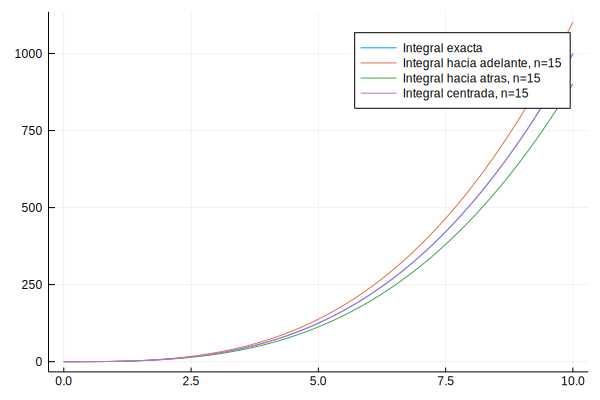

In [31]:
fig = Plots.plot()
n = 15
xs = range(0,10,length=100)
ys1 = [x^3 for x in xs]
Plots.plot!(xs,ys1,label="Integral exacta")
ys2 = [intAdelante(prueba,0,x,n) for x in xs]
Plots.plot!(xs,ys2,label="Integral hacia adelante, n=$(n)")
ys3 = [intAtras(prueba,0,x,n) for x in xs]
Plots.plot!(xs,ys3,label="Integral hacia atras, n=$(n)")
ys4 = [intCentrada(prueba,0,x,n) for x in xs]
Plots.plot!(xs,ys4,label="Integral centrada, n=$(n)")
display(fig)